In [ ]:
# Import necessary libraries
import pandas as pd

# I. Data analysis and preparation

# Study the data by displaying the corresponding information

In [ ]:
caract_df = pd.read_csv('/content/caract-2023.csv',delimiter = ';')
lieux_df = pd.read_csv('/content/lieux-2023.csv',delimiter = ';')
usagers_df = pd.read_csv('/content/usagers-2023.csv',delimiter = ';')
vehicules_df = pd.read_csv('/content/vehicules-2023.csv',delimiter = ';')
caract_df.head()
caract_df.shape

<ipython-input-236-7ee88314cd6f>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux_df = pd.read_csv('/content/lieux-2023.csv',delimiter = ';')


(54822, 15)

In [ ]:
lieux_df.head()
lieux_df.shape

(70860, 18)

In [ ]:
usagers_df.head()
usagers_df.shape

(125789, 16)

In [ ]:
vehicules_df.head()
vehicules_df.shape

(93585, 11)

In [ ]:
# Step 1: Display data information for each file
print("---- CARACTÉRISTIQUES ----")
print(caract_df.info())
print("\n---- LIEUX ----")
print(lieux_df.info())
print("\n---- USAGERS ----")
print(usagers_df.info())
print("\n---- VÉHICULES ----")
print(vehicules_df.info())

---- CARACTÉRISTIQUES ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  54822 non-null  int64 
 1   jour     54822 non-null  int64 
 2   mois     54822 non-null  int64 
 3   an       54822 non-null  int64 
 4   hrmn     54822 non-null  object
 5   lum      54822 non-null  int64 
 6   dep      54822 non-null  object
 7   com      54822 non-null  object
 8   agg      54822 non-null  int64 
 9   int      54822 non-null  int64 
 10  atm      54822 non-null  int64 
 11  col      54822 non-null  int64 
 12  adr      53433 non-null  object
 13  lat      54822 non-null  object
 14  long     54822 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ MB
None

---- LIEUX ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70860 entries, 0 to 70859
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   ---

# Merge data files

In [ ]:
# Step 2: Merge datasets based on the common key 'Num_Acc'
# We will perform a series of merges to create a single unified DataFrame
merged_df = caract_df.merge(lieux_df, on='Num_Acc', how='inner')                                    .merge(usagers_df, on='Num_Acc', how='inner')                                    .merge(vehicules_df, on='Num_Acc', how='inner')

# Display information on the merged DataFrame
print("\n---- Merged Data ----")
print(merged_df.info())
merged_df.head()


---- Merged Data ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309341 entries, 0 to 309340
Data columns (total 57 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Num_Acc        309341 non-null  int64  
 1   jour           309341 non-null  int64  
 2   mois           309341 non-null  int64  
 3   an             309341 non-null  int64  
 4   hrmn           309341 non-null  object 
 5   lum            309341 non-null  int64  
 6   dep            309341 non-null  object 
 7   com            309341 non-null  object 
 8   agg            309341 non-null  int64  
 9   int            309341 non-null  int64  
 10  atm            309341 non-null  int64  
 11  col            309341 non-null  int64  
 12  adr            301509 non-null  object 
 13  lat            309341 non-null  object 
 14  long           309341 non-null  object 
 15  catr           309341 non-null  int64  
 16  voie           258894 non-null  object 
 17  v1    

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,id_vehicule_y,num_veh_y,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,155 680 557,A01,1,30,0,0,5,1,1,NaN
2,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,155 680 556,A01,2,7,0,1,1,1,1,NaN
3,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,155 680 556,A01,2,7,0,1,1,1,1,NaN
4,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,155 680 554,B01,1,2,0,2,1,16,1,NaN


# Clean up the database

In [ ]:
# Step 3: Data Cleaning
# Check for NaN values and their percentages to determine columns for removal or filling
nan_counts = merged_df.isna().sum()
nan_percentage = (nan_counts / len(merged_df)) * 100
print("\n---- NaN Percentage per Column ----")
print(nan_percentage)



---- NaN Percentage per Column ----
Num_Acc           0.000000
jour              0.000000
mois              0.000000
an                0.000000
hrmn              0.000000
lum               0.000000
dep               0.000000
com               0.000000
agg               0.000000
int               0.000000
atm               0.000000
col               0.000000
adr               2.531834
lat               0.000000
long              0.000000
catr              0.000000
voie             16.307893
v1                0.000000
v2               91.705270
circ              0.000000
nbv               0.000000
vosp              0.000000
prof              0.000000
pr                0.000000
pr1               0.000000
plan              0.000000
lartpc           99.948277
larrout           0.000000
surf              0.000000
infra             0.000000
situ              0.000000
vma               0.000000
id_usager         0.000000
id_vehicule_x     0.000000
num_veh_x         0.000000
place             

**Drop** columns with a majority (>50%) of NaN values

In [ ]:

# Drop columns with a majority (>50%) of NaN values
columns_to_drop = nan_percentage[nan_percentage > 50].index.tolist()
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)
print(f"\nColumns dropped due to high NaN values: {columns_to_drop}")


Columns dropped due to high NaN values: ['v2', 'lartpc', 'occutc']


# Populating NaN values by different methods

In [ ]:
# Step 4: Fill remaining NaN values
# Here, we use median for numeric columns
numeric_columns = merged_df_cleaned.select_dtypes(include='number').columns
merged_df_cleaned[numeric_columns] = merged_df_cleaned[numeric_columns].fillna(merged_df_cleaned[numeric_columns].median())

In [ ]:
nan_counts = merged_df_cleaned.isna().sum()
nan_percentage = (nan_counts / len(merged_df_cleaned)) * 100
print(nan_percentage)

Num_Acc           0.000000
jour              0.000000
mois              0.000000
an                0.000000
hrmn              0.000000
lum               0.000000
dep               0.000000
com               0.000000
agg               0.000000
int               0.000000
atm               0.000000
col               0.000000
adr               2.531834
lat               0.000000
long              0.000000
catr              0.000000
voie             16.307893
v1                0.000000
circ              0.000000
nbv               0.000000
vosp              0.000000
prof              0.000000
pr                0.000000
pr1               0.000000
plan              0.000000
larrout           0.000000
surf              0.000000
infra             0.000000
situ              0.000000
vma               0.000000
id_usager         0.000000
id_vehicule_x     0.000000
num_veh_x         0.000000
place             0.000000
catu              0.000000
grav              0.000000
sexe              0.000000
a

In [ ]:
# Correcting the code to use 'merged_df_cleaned' as the dataset for filling missing values

# For 'adr' (address), fill missing values with "Unknown"
merged_df_cleaned['adr'].fillna("Unknown", inplace=True)

# For 'voie', determine whether to fill with "Unknown" (categorical) or -1 (numeric)
if merged_df_cleaned['voie'].dtype == 'object':
    merged_df_cleaned['voie'].fillna("Unknown", inplace=True)
else:
    merged_df_cleaned['voie'].fillna(-1, inplace=True)


<ipython-input-246-08e5f5b02d84>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_cleaned['adr'].fillna("Unknown", inplace=True)
<ipython-input-246-08e5f5b02d84>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Show unique values and counts for 'adr' and 'voie' columns
adr_values = merged_df_cleaned['adr'].value_counts(dropna=False)
voie_values = merged_df_cleaned['voie'].value_counts(dropna=False)

print("Unique values in 'adr' column:")
print(adr_values)

print("\nUnique values in 'voie' column:")
print(voie_values)

Unique values in 'adr' column:
adr
Unknown                 7832
A86                     2095
AUTOROUTE A6            1781
A13                     1712
AUTOROUTE A1            1664
                        ... 
NOEL (RUE JULES)           1
FORGES (RUE DES)           1
PROVENCE (CHEMIN DE)       1
Route de Barjols           1
Route de Baires            1
Name: count, Length: 29081, dtype: int64

Unique values in 'voie' column:
voie
Unknown                    50447
86                          2548
1                           2168
4                           1976
6                           1936
                           ...  
D957                           1
VILLENEUVE (RUE DE)            1
CORPS DU BOIS                  1
BENOIST   RUE DU MOULIN        1
CD 70                          1
Name: count, Length: 20064, dtype: int64


In [ ]:
# Display the cleaned and final dataset structure
print("\n---- Final Merged and Cleaned Data ----")
print(merged_df_cleaned.info())
# Confirm there are no missing values left in the dataset
nan_counts_after_filling = merged_df_cleaned.isna().sum()
nan_counts_after_filling


---- Final Merged and Cleaned Data ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309341 entries, 0 to 309340
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Num_Acc        309341 non-null  int64  
 1   jour           309341 non-null  int64  
 2   mois           309341 non-null  int64  
 3   an             309341 non-null  int64  
 4   hrmn           309341 non-null  object 
 5   lum            309341 non-null  int64  
 6   dep            309341 non-null  object 
 7   com            309341 non-null  object 
 8   agg            309341 non-null  int64  
 9   int            309341 non-null  int64  
 10  atm            309341 non-null  int64  
 11  col            309341 non-null  int64  
 12  adr            309341 non-null  object 
 13  lat            309341 non-null  object 
 14  long           309341 non-null  object 
 15  catr           309341 non-null  int64  
 16  voie           309341 non-null  o

,0
Num_Acc,0
jour,0
mois,0
an,0
hrmn,0
lum,0
dep,0
com,0
agg,0
int,0


In [ ]:
# Confirm there are no missing values left in the dataset
nan_counts_after_filling = merged_df_cleaned.isna().sum()
nan_counts_after_filling

,0
Num_Acc,0
jour,0
mois,0
an,0
hrmn,0
lum,0
dep,0
com,0
agg,0
int,0


In [ ]:
merged_df_cleaned['hrmn'].values

array(['06:00', '06:00', '05:30', ..., '16:30', '16:30', '16:30'],
      dtype=object)

In [ ]:
print(merged_df_cleaned['hrmn'].isnull().sum())  # Check for missing values
print(merged_df_cleaned['hrmn'].unique())       # Check unique values


0
['06:00' '05:30' '20:50' ... '03:26' '20:39' '13:16']


In [ ]:
# Split the `hrmn` column into hour and minute
merged_df_cleaned[['hour', 'minute']] = merged_df_cleaned['hrmn'].str.split(':', expand=True)

# Convert the new columns to integers
merged_df_cleaned['hour'] = merged_df_cleaned['hour'].astype(int)
merged_df_cleaned['minute'] = merged_df_cleaned['minute'].astype(int)

# Verify the results
print(merged_df_cleaned[['hrmn', 'hour', 'minute']].head())

    hrmn  hour  minute
0  06:00     6       0
1  06:00     6       0
2  05:30     5      30
3  05:30     5      30
4  20:50    20      50


In [ ]:
# Group hours into broader categories
merged_df_cleaned['hour_category'] = pd.cut(
    merged_df_cleaned['hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    include_lowest=True
)
print(merged_df_cleaned[['hour', 'hour_category']].head())


   hour hour_category
0     6         Night
1     6         Night
2     5         Night
3     5         Night
4    20       Evening


# Analyze data by statistics (min, max, median)

In [ ]:
# Select numeric columns only
numeric_columns = merged_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate min, max, and median for each numeric column
statistics_summary = numeric_columns.agg(['min', 'median', 'max'])

# Display the statistical summary
print("Statistics summary (min, median, max):")
print(statistics_summary)


Statistics summary (min, median, max):
             Num_Acc  jour  mois      an  lum  agg  int  atm  col  catr  ...  \
min     2.023000e+11   1.0   1.0  2023.0 -1.0  1.0 -1.0 -1.0 -1.0   1.0  ...   
median  2.023000e+11  15.0   7.0  2023.0  1.0  2.0  2.0  1.0  3.0   3.0  ...   
max     2.023001e+11  31.0  12.0  2023.0  5.0  2.0  9.0  9.0  7.0   9.0  ...   

        etatp  senc  catv   obs  obsm  choc  manv  motor  hour  minute  
min      -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   -1.0   0.0     0.0  
median   -1.0   2.0   7.0   0.0   2.0   2.0   2.0    1.0  15.0    28.0  
max       3.0   3.0  99.0  17.0   9.0   9.0  26.0    6.0  23.0    59.0  

[3 rows x 39 columns]


# Explain the severity of accidents according to the other variables (create a new variable "mortality" which indicates whether or not the victim died as a result of the accident: killed=1 no=0)

In [ ]:
 # Step 5: Create the 'mortality' variable: 1 for fatalities, 0 for others
merged_df_cleaned['mortality'] = merged_df_cleaned['grav'].apply(lambda x: 1 if x == 2 else 0)

# II. Visualization and modeling

In [ ]:
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309341 entries, 0 to 309340
Data columns (total 58 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Num_Acc        309341 non-null  int64   
 1   jour           309341 non-null  int64   
 2   mois           309341 non-null  int64   
 3   an             309341 non-null  int64   
 4   hrmn           309341 non-null  object  
 5   lum            309341 non-null  int64   
 6   dep            309341 non-null  object  
 7   com            309341 non-null  object  
 8   agg            309341 non-null  int64   
 9   int            309341 non-null  int64   
 10  atm            309341 non-null  int64   
 11  col            309341 non-null  int64   
 12  adr            309341 non-null  object  
 13  lat            309341 non-null  object  
 14  long           309341 non-null  object  
 15  catr           309341 non-null  int64   
 16  voie           309341 non-null  object  
 17  v1        

In [ ]:
# Factorize 'adr' to create numeric encoding
merged_df_cleaned['adr_encoded'] = merged_df_cleaned['adr'].factorize()[0]

# Create the 'age' column from 'an_nais' and drop 'an_nais'
current_year = 2023  # Assuming the current year
merged_df_cleaned['age'] = current_year - merged_df_cleaned['an_nais']

# Drop the 'an_nais' column
if 'an_nais' in merged_df_cleaned.columns:
    merged_df_cleaned.drop(columns=['an_nais'], inplace=True)

# Verify the changes
print(merged_df_cleaned[['age']].head())


    age
0  45.0
1  45.0
2  26.0
3  26.0
4  36.0


In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'adr', 'lat', 'long',
    'Num_Acc', 'id_usager', 'id_vehicule_x', 'num_veh_x', 'id_vehicule_y', 'num_veh_y','hrmn'
]

# Drop the columns
merged_df_cleaned = merged_df_cleaned.drop(columns=columns_to_drop)

# Display remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(merged_df_cleaned.columns)
merged_df_cleaned.info()

Remaining columns after dropping unnecessary ones:
Index(['jour', 'mois', 'an', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col',
       'catr', 'voie', 'v1', 'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1',
       'plan', 'larrout', 'surf', 'infra', 'situ', 'vma', 'place', 'catu',
       'grav', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp',
       'etatp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'hour',
       'minute', 'hour_category', 'mortality', 'adr_encoded', 'age'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309341 entries, 0 to 309340
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   jour           309341 non-null  int64   
 1   mois           309341 non-null  int64   
 2   an             309341 non-null  int64   
 3   lum            309341 non-null  int64   
 4   dep            309341 non-null  object  
 5   com            309341 non-null  objec

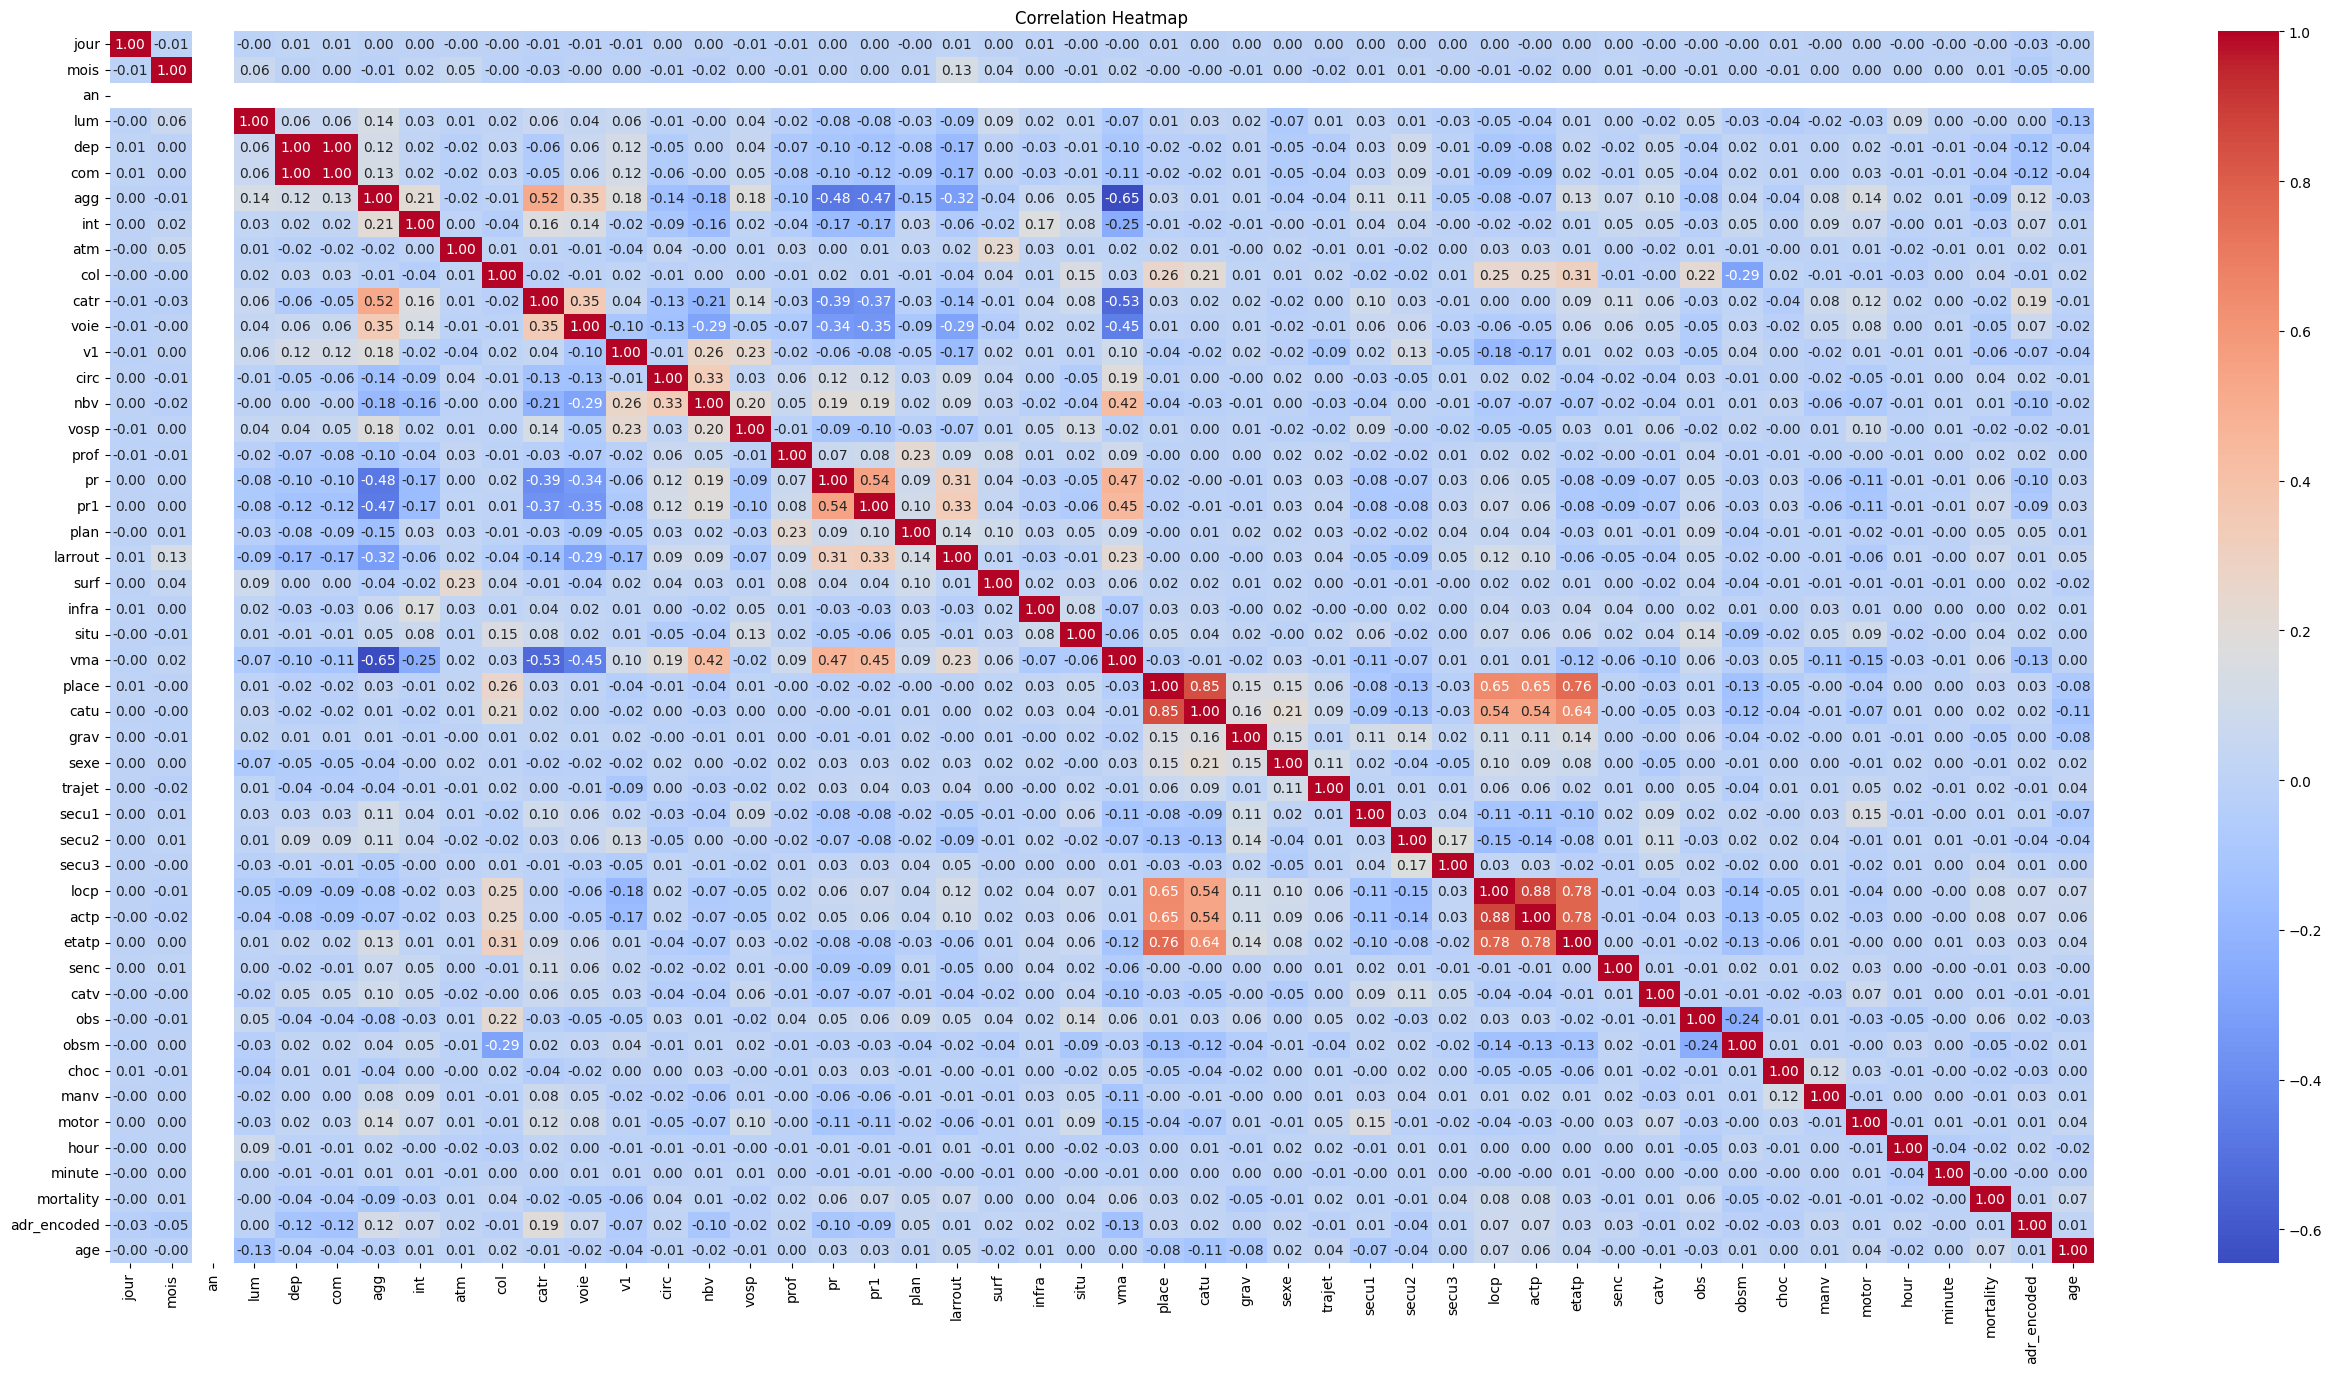

Features most correlated with mortality:
 mortality      1.000000
actp           0.080157
locp           0.075483
larrout        0.074289
age            0.071211
pr1            0.068128
obs            0.060547
pr             0.057213
vma            0.055561
plan           0.047950
secu3          0.042983
situ           0.039147
col            0.035737
circ           0.035087
etatp          0.034273
place          0.031149
prof           0.024397
trajet         0.023465
catu           0.021141
adr_encoded    0.013675
atm            0.011923
nbv            0.010380
secu1          0.006649
mois           0.006445
catv           0.005882
surf           0.004370
infra          0.000376
jour          -0.000213
minute        -0.000439
lum           -0.000978
secu2         -0.006061
motor         -0.006347
manv          -0.006719
senc          -0.007666
sexe          -0.012988
hour          -0.018001
choc          -0.018881
vosp          -0.020202
catr          -0.024823
int           -0.02956

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy library and alias it as 'np'

# List of non-numeric (object) columns
non_numeric_cols = ['dep', 'com', 'voie', 'nbv', 'pr', 'pr1', 'larrout', 'actp' ]
# Encode these columns using LabelEncoder
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    # Convert the column to string type before applying LabelEncoder
    merged_df_cleaned[col] = merged_df_cleaned[col].astype(str)
    merged_df_cleaned[col] = le.fit_transform(merged_df_cleaned[col])
    label_encoders[col] = le

# Now the dataset contains only numeric value
# Calculate the correlation matrix for numeric columns
correlation_matrix = merged_df_cleaned.select_dtypes(include=np.number).corr()
# Select only numeric columns for correlation

# Plot the heatmap
plt.figure(figsize=(32, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Sort correlations with 'mortality' to identify important features
mortality_correlation = correlation_matrix['mortality'].sort_values(ascending=False)
print("Features most correlated with mortality:\n", mortality_correlation)

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Select relevant features
selected_columns = ['surf',
'infra',
'actp' ,
'locp' ,
'larrout' ,
'age'  ,
'pr1' ,
'obs',
'pr',
'vma',
'plan' ,
'secu3',
'situ',
'col',
'circ'  ,
'etatp'  ,
'place'   ,
'prof'   ,
'trajet' ,
'catu'   ,
'adr_encoded' ,
'atm'          ,
'nbv'           ,
'secu1'       ,
'mois'          ,
'catv'           ,

'mortality']
data = merged_df_cleaned[selected_columns]

X = data.drop('mortality', axis=1)
y = data['mortality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# Random Forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_forest))

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Network:")
print(classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     60684
           1       0.00      0.00      0.00      1185

    accuracy                           0.98     61869
   macro avg       0.49      0.50      0.50     61869
weighted avg       0.96      0.98      0.97     61869

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     60684
           1       0.50      0.55      0.52      1185

    accuracy                           0.98     61869
   macro avg       0.74      0.77      0.76     61869
weighted avg       0.98      0.98      0.98     61869

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     60684
           1       0.92      0.32      0.47      1185

    accuracy                           0.99     61869
   macro avg       0.95      0.66      0.73     61869
weighted avg       0.99

# Visualizing the distribution of the 'mortality' variable according to the different variables (gender of victims, age, etc.)

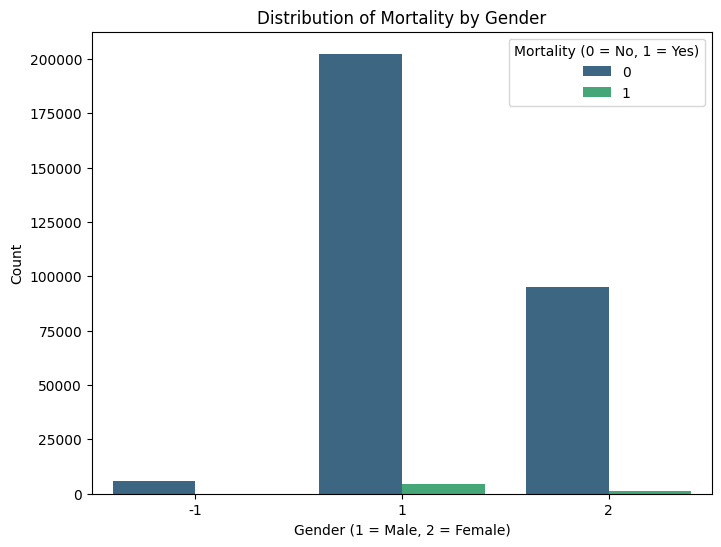

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Visualize the distribution of 'mortality' according to gender ('sexe')
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df_cleaned, x='sexe', hue='mortality', palette='viridis')
plt.title('Distribution of Mortality by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.legend(title='Mortality (0 = No, 1 = Yes)')
plt.show()

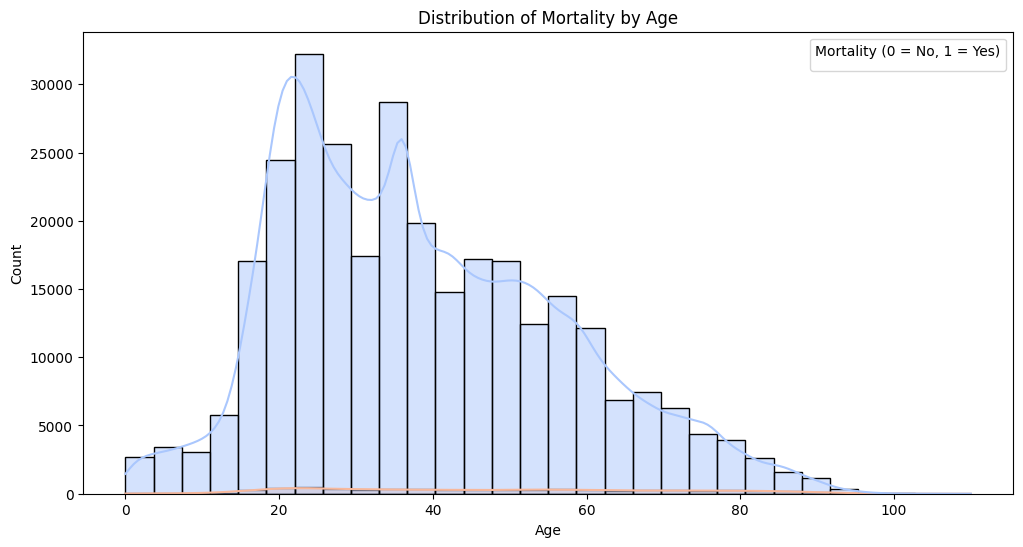

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Visualize the distribution of 'mortality' by age (approximation using year of birth)
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df_cleaned, x=merged_df_cleaned['age'], hue='mortality', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Mortality by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mortality (0 = No, 1 = Yes)')
plt.show()

# Visualizing the level of correlation between variables

In [ ]:

# Define threshold for correlation
correlation_threshold = 0.05

# Identify columns to keep
columns_to_keep = correlation_matrix['mortality'][
    correlation_matrix['mortality'].abs() >= correlation_threshold
].index.tolist()

# Drop columns below the threshold
filtered_data = merged_df_cleaned[columns_to_keep]

# Visualizing based on time: Number of accidents in months,Number of accidents by hour (time of day)

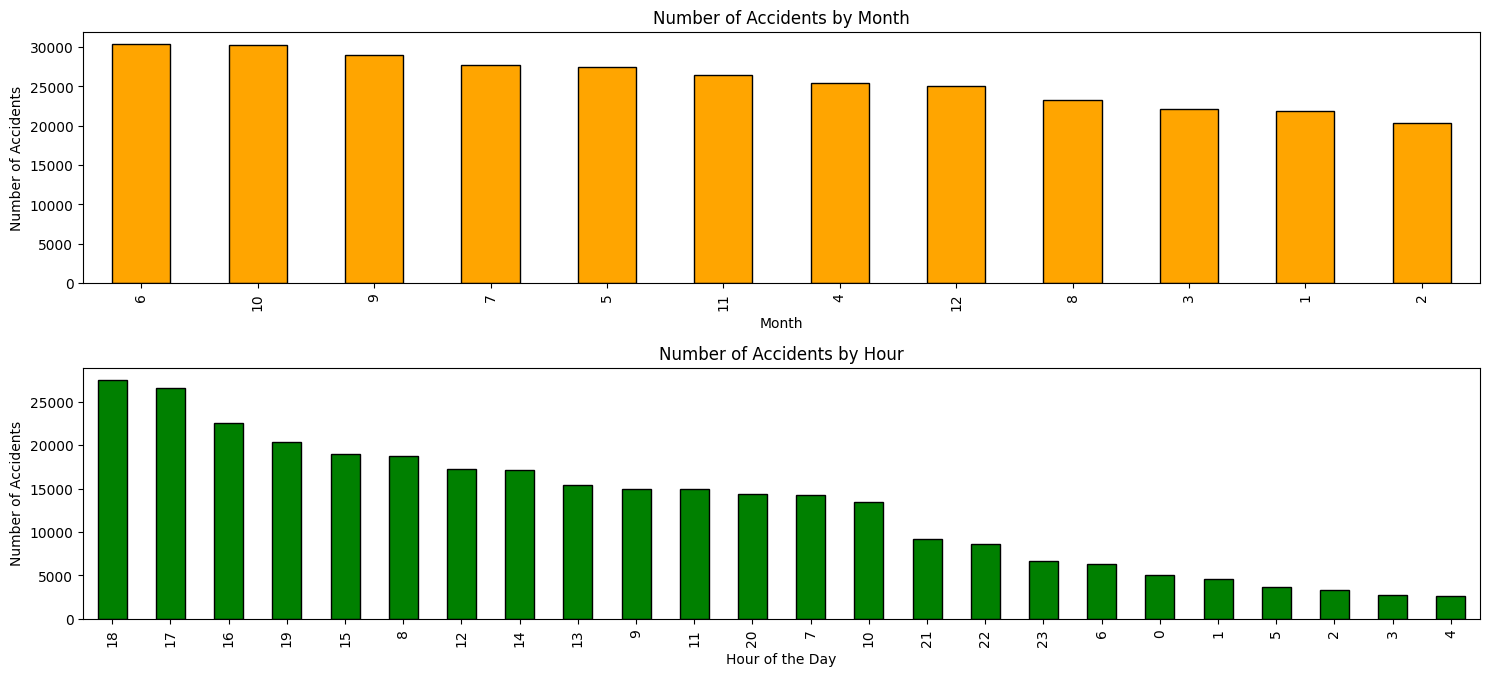

In [ ]:
# Ensure `hour` is properly extracted and numerical
if 'hour' not in merged_df_cleaned.columns:
    merged_df_cleaned['hour'] = merged_df_cleaned['hrmn'].str.split(':', expand=True)[0].astype(int)

# 1. Number of accidents by year
accidents_by_year = merged_df_cleaned['an'].value_counts()

# 2. Number of accidents by month
accidents_by_month = merged_df_cleaned['mois'].value_counts()

# 3. Number of accidents by hour (time of day)
accidents_by_hour = merged_df_cleaned['hour'].value_counts()

# Find the most dangerous time of day (hour with the most accidents)
most_dangerous_hour = accidents_by_hour.idxmax()
most_dangerous_hour_count = accidents_by_hour.max()

# Plot the analyses
plt.figure(figsize=(15, 10))

# Plot accidents by month
plt.subplot(3, 1, 2)
accidents_by_month.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Plot accidents by hour
plt.subplot(3, 1, 3)
accidents_by_hour.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()



<ipython-input-265-4fb8f894f973>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['sexe_grav'] = merged_df_cleaned['sexe'] * merged_df_cleaned['grav']
<ipython-input-265-4fb8f894f973>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['hour_vma'] = merged_df_cleaned['hour'] * merged_df_cleaned['vma']
<ipython-input-265-4fb8f894f973>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Feature Interactions Correlation with Mortality:
sexe_grav   -0.052556
hour_vma     0.029424
plan_locp    0.064051
Name: mortality, dtype: float64


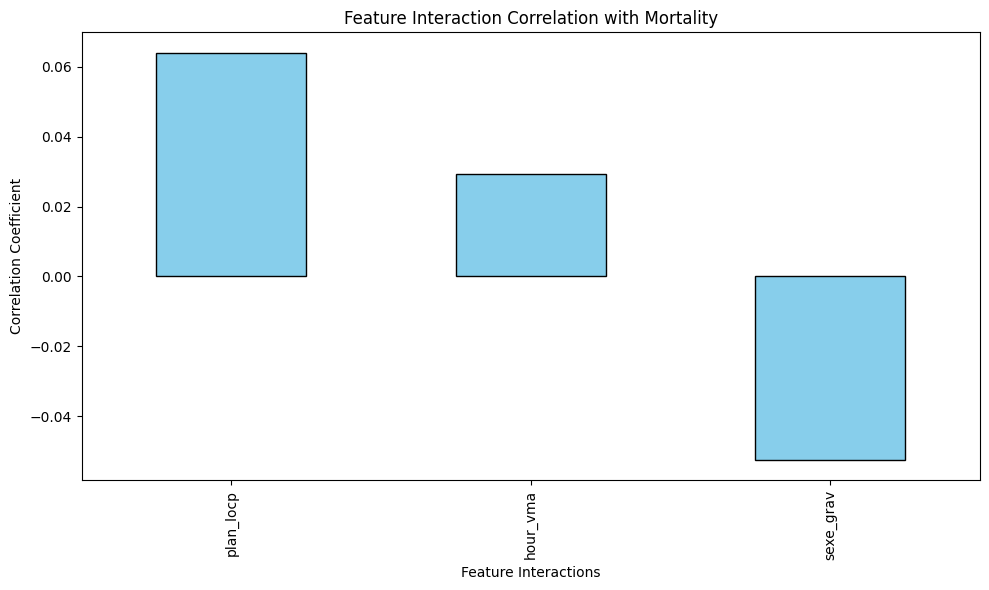

In [ ]:
# Feature interaction analysis with mortality

# Remove invalid gender entries (-1)
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['sexe'] != -1]

# Interactions: sexe * grav, hour * vma, and plan * locp
# Create interaction features
merged_df_cleaned['sexe_grav'] = merged_df_cleaned['sexe'] * merged_df_cleaned['grav']
merged_df_cleaned['hour_vma'] = merged_df_cleaned['hour'] * merged_df_cleaned['vma']
merged_df_cleaned['plan_locp'] = merged_df_cleaned['plan'] * merged_df_cleaned['locp']

# Correlation of interaction features with mortality
interaction_features = ['sexe_grav', 'hour_vma', 'plan_locp', 'mortality']
interaction_correlations = merged_df_cleaned[interaction_features].corr()

# Extract correlations with mortality
mortality_correlations = interaction_correlations['mortality'].drop('mortality')

# Display correlations
print("Feature Interactions Correlation with Mortality:")
print(mortality_correlations)

# Visualize correlations
mortality_correlations.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Feature Interaction Correlation with Mortality")
plt.xlabel("Feature Interactions")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


## The most dangerous time of day


In [ ]:
# Print the most dangerous time of day
print(f"The most dangerous time of day is {most_dangerous_hour}:00 with {most_dangerous_hour_count} accidents.")


The most dangerous time of day is 18:00 with 27538 accidents.


# Implement machine learning models

In [ ]:
column_info = merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303396 entries, 0 to 309340
Data columns (total 52 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   jour           303396 non-null  int64   
 1   mois           303396 non-null  int64   
 2   an             303396 non-null  int64   
 3   lum            303396 non-null  int64   
 4   dep            303396 non-null  int64   
 5   com            303396 non-null  int64   
 6   agg            303396 non-null  int64   
 7   int            303396 non-null  int64   
 8   atm            303396 non-null  int64   
 9   col            303396 non-null  int64   
 10  catr           303396 non-null  int64   
 11  voie           303396 non-null  int64   
 12  v1             303396 non-null  int64   
 13  circ           303396 non-null  int64   
 14  nbv            303396 non-null  int64   
 15  vosp           303396 non-null  int64   
 16  prof           303396 non-null  int64   
 17  pr             

In [ ]:
# Correcting the list of columns to explore based on the dataset's actual columns
actual_columns_to_explore = ['age', 'hour_category', 'vma', 'surf','catv']

# Analyze the unique values, counts, and statistics for the available columns
column_exploration_corrected = {
    col: {
        "Unique Values": merged_df_cleaned[col].unique(),
        "Value Counts": merged_df_cleaned[col].value_counts(),
        "Statistics": merged_df_cleaned[col].describe() if merged_df_cleaned[col].dtype in ['int64', 'float64'] else "N/A"
    }
    for col in actual_columns_to_explore
}

column_exploration_corrected

{'age': {'Unique Values': array([ 45.,  26.,  36.,  39.,  22.,  28.,  55.,  67.,  38.,  20.,  61.,
          35.,  48.,  44.,   3.,  43.,  42.,  24.,  70.,  13.,  46.,  27.,
          41.,  29.,  31.,   1.,  25.,  19.,  49.,  65.,  21.,   8.,  12.,
          33.,  16.,  14.,  15.,  32.,  56.,  23.,  17.,  68.,  54.,  60.,
          77.,  50.,  76.,  81.,  34.,  59.,  30.,  37.,  66.,  62.,  91.,
          94.,  51.,   7.,  95.,  58.,  80.,  52.,  40.,  53.,  63.,   9.,
          47.,  84.,  18.,  73.,  78.,  64.,  71.,  72.,  82.,  69.,   4.,
          86.,  87.,  89.,  79.,  57.,   6.,  83.,  75.,  11.,   0.,  10.,
          74.,  90.,   5.,  88.,  93.,   2.,  92.,  85.,  96., 100.,  97.,
          99.,  98., 102., 101., 106., 103., 104., 110.]),
  'Value Counts': age
  23.0     8745
  20.0     8744
  22.0     8703
  21.0     8559
  24.0     7739
           ... 
  102.0       6
  106.0       2
  104.0       2
  103.0       1
  110.0       1
  Name: count, Length: 107, dtype: int64,
  

In [ ]:
# Display the unique values of the columns 'jour', 'mois', and 'an'
if all(col in merged_df_cleaned.columns for col in ['jour', 'mois', 'an']):
    unique_jour = merged_df_cleaned['jour'].unique()
    unique_mois = merged_df_cleaned['mois'].unique()
    unique_an = merged_df_cleaned['an'].unique()
    unique_sexe = merged_df_cleaned['sexe'].unique()
else:
    unique_jour, unique_mois, unique_an , unique_sexe  = "Column not found", "Column not found", "Column not found"

unique_jour


array([ 7,  6,  8,  3,  5,  4, 24, 18, 28, 23, 27, 17,  1, 30, 15,  2, 26,
       29, 19, 10, 25, 22, 31, 11, 21, 13, 20, 16, 12, 14,  9])

In [ ]:
merged_df_cleaned = merged_df_cleaned.drop(columns=['an'])

In [ ]:
"""# Select the columns to check correlations
columns_to_correlate = ['age', 'hour_category', 'vma', 'surf', 'mortality','catv'
'sexe_grav' , 'hour_vma'  ,
'plan_locp' ,
'plan_simplified'
]

# Encode categorical data to numeric for correlation ('hour_category')
merged_df_cleaned['hour_category_encoded'] = merged_df_cleaned['hour_category'].astype('category').cat.codes

# Update the list with the encoded version of 'hour_category'
columns_to_correlate.remove('hour_category')
columns_to_correlate.append('hour_category_encoded')

# Compute the correlation matrix for selected features
correlation_matrix = merged_df_cleaned[columns_to_correlate].corr()

correlation_matrix
"""

"# Select the columns to check correlations\ncolumns_to_correlate = ['age', 'hour_category', 'vma', 'surf', 'mortality','catv'\n'sexe_grav' , 'hour_vma'  ,\n'plan_locp' ,\n'plan_simplified'\n]\n\n# Encode categorical data to numeric for correlation ('hour_category')\nmerged_df_cleaned['hour_category_encoded'] = merged_df_cleaned['hour_category'].astype('category').cat.codes\n\n# Update the list with the encoded version of 'hour_category'\ncolumns_to_correlate.remove('hour_category')\ncolumns_to_correlate.append('hour_category_encoded')\n\n# Compute the correlation matrix for selected features\ncorrelation_matrix = merged_df_cleaned[columns_to_correlate].corr()\n\ncorrelation_matrix\n"

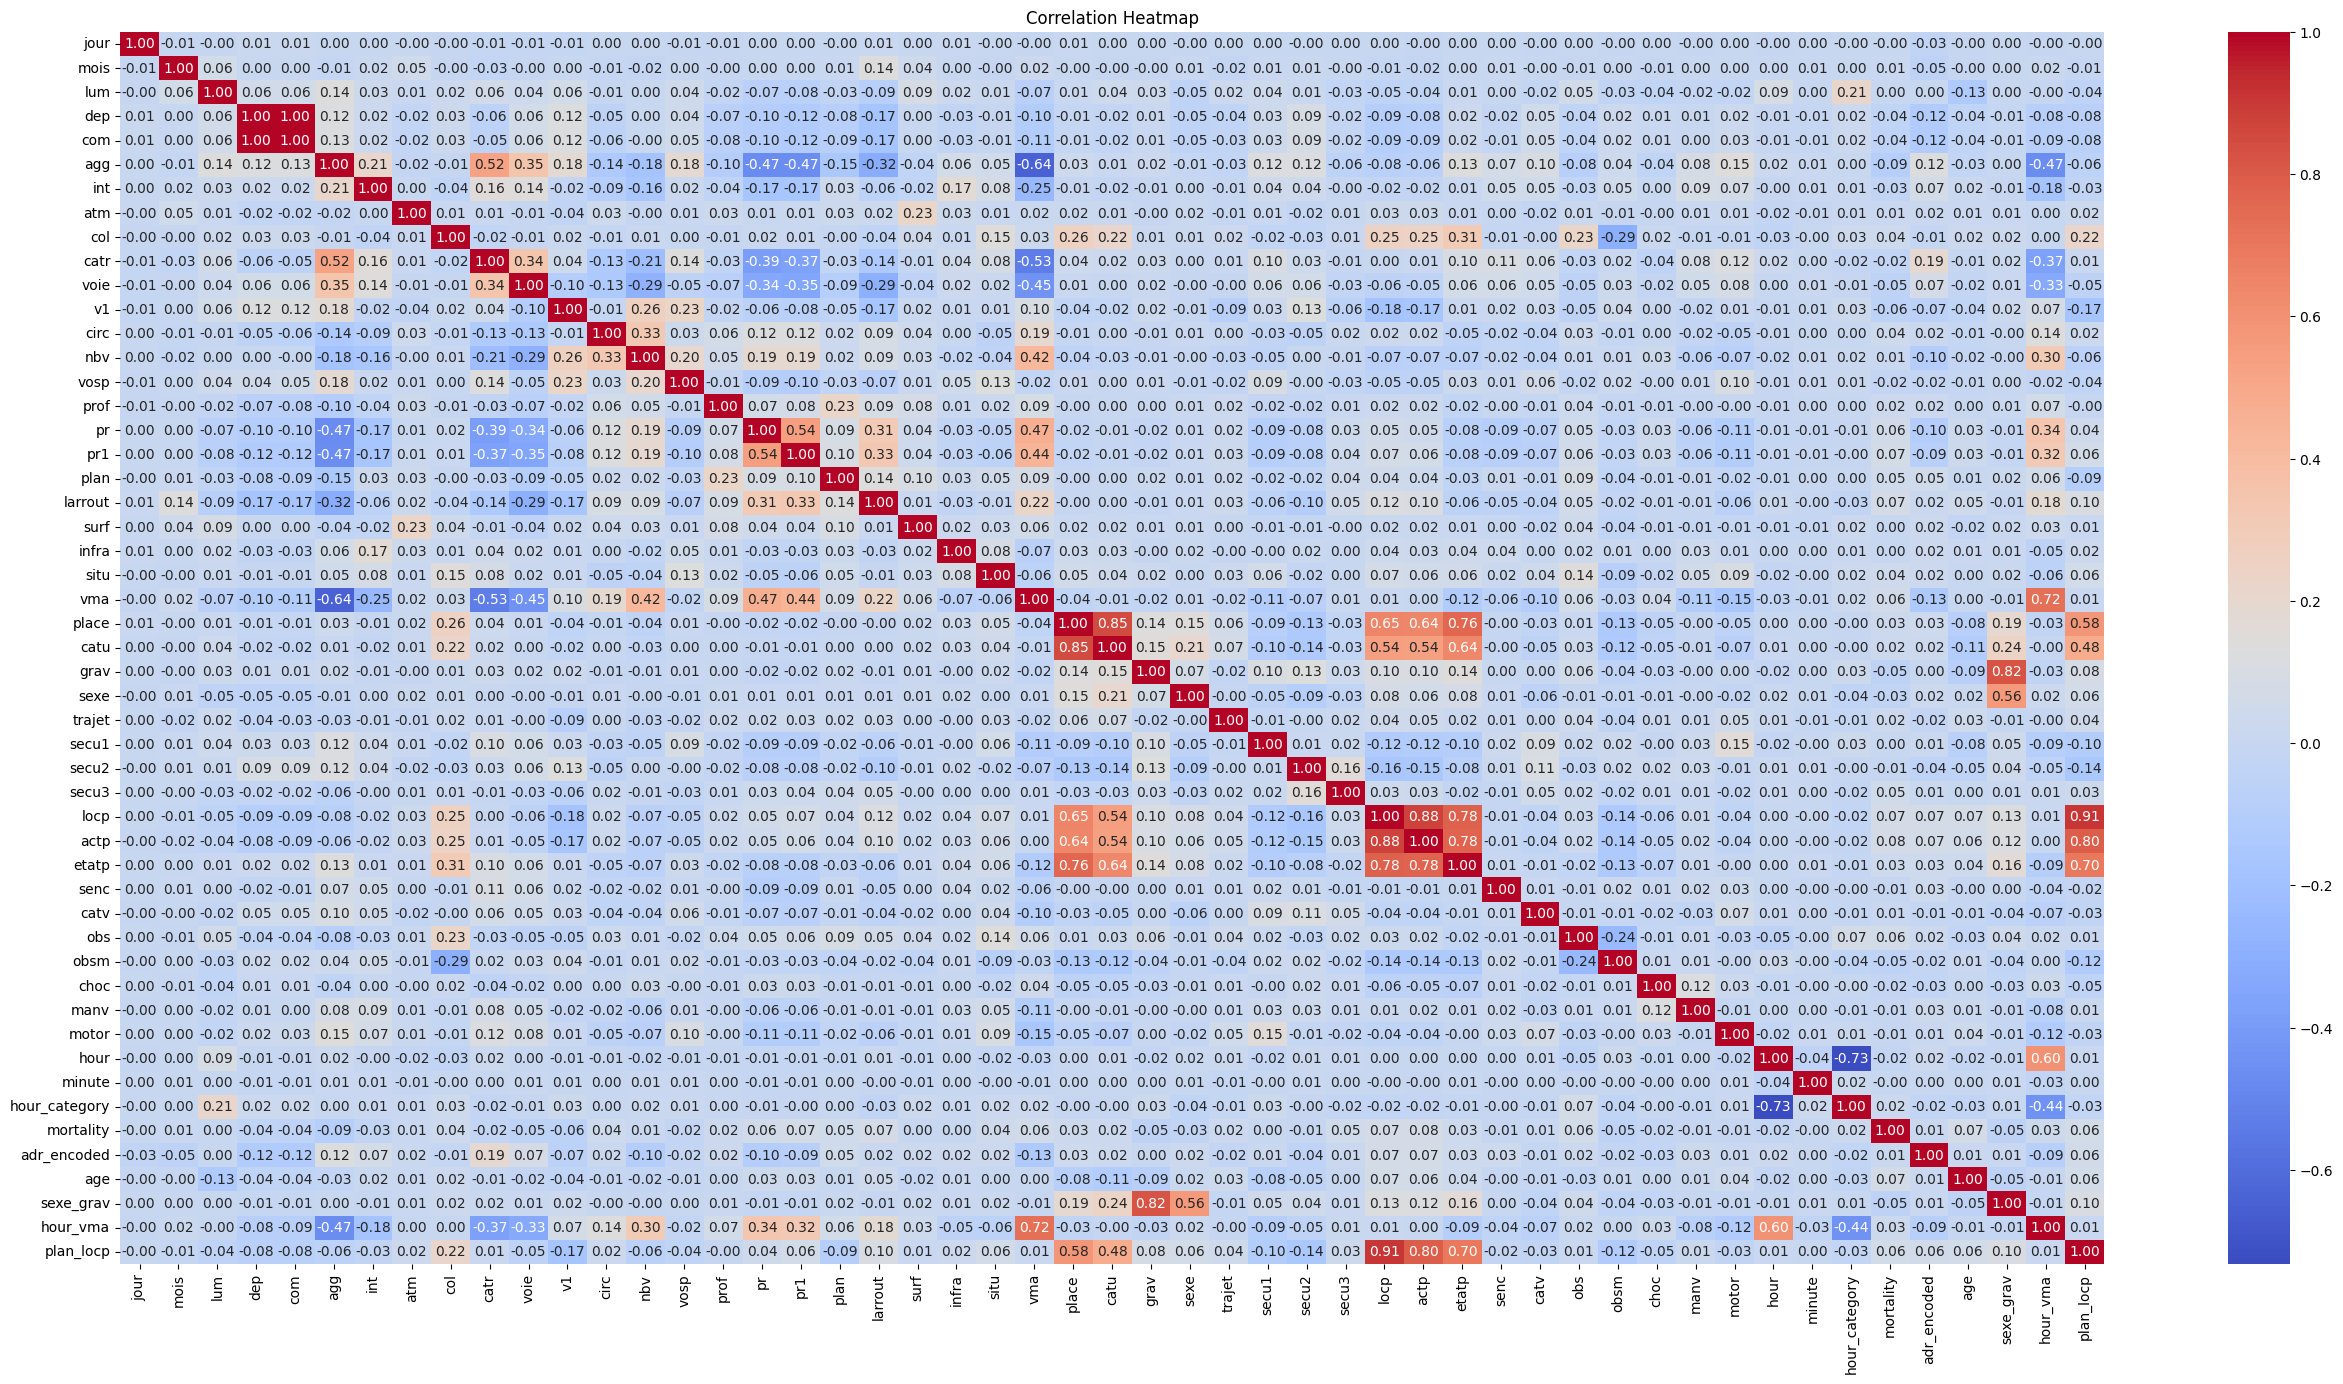

Features most correlated with mortality:
 mortality        1.000000
actp             0.079146
locp             0.074414
larrout          0.074015
age              0.070843
pr1              0.067892
plan_locp        0.064051
obs              0.060599
pr               0.056867
vma              0.055249
plan             0.047867
secu3            0.045993
situ             0.039674
col              0.036251
circ             0.035127
etatp            0.033740
place            0.030189
hour_vma         0.029424
prof             0.024426
trajet           0.019931
catu             0.019814
hour_category    0.019523
adr_encoded      0.013695
atm              0.011842
nbv              0.010282
mois             0.006613
catv             0.006154
secu1            0.004666
surf             0.004266
infra            0.000293
lum              0.000006
jour            -0.000288
minute          -0.000428
motor           -0.006670
manv            -0.006926
secu2           -0.007415
senc            -0.007

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # For numeric operations

# List of non-numeric columns to encode (if any, e.g., category)
non_numeric_cols = ['hour_category']

# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in non_numeric_cols:
    if col in merged_df_cleaned.columns:
        le = LabelEncoder()
        merged_df_cleaned[col] = le.fit_transform(merged_df_cleaned[col])
        label_encoders[col] = le

# Calculate the correlation matrix for numeric columns
correlation_matrix = merged_df_cleaned.select_dtypes(include=np.number).corr()

# Plot the correlation heatmap
plt.figure(figsize=(32, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Sort correlations with 'mortality' to identify important features
if 'mortality' in correlation_matrix.columns:
    mortality_correlation = correlation_matrix['mortality'].sort_values(ascending=False)
    print("Features most correlated with mortality:\n", mortality_correlation)
else:
    print("'mortality' column not found in the correlation matrix.")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, make_scorer
import numpy as np
from imblearn.over_sampling import SMOTE


# Select relevant features
selected_columns = ['lum', 'agg', 'atm', 'col', 'catr', 'circ', 'nbv', 'prof', 'plan', 'surf',
                    'infra', 'situ', 'vma', 'catv', 'obs', 'obsm', 'choc', 'manv', 'grav', 'sexe',
                    'age', 'mortality']
data = merged_df_cleaned[selected_columns]

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Features and target
X = data.drop('mortality', axis=1)
y = data['mortality']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-Validation
print("\nPerforming Cross-Validation Before Train-Test Split...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    precision = cross_val_score(model, X_scaled, y, cv=skf, scoring=make_scorer(precision_score, average='weighted'))
    recall = cross_val_score(model, X_scaled, y, cv=skf, scoring=make_scorer(recall_score, average='weighted'))
    f1 = cross_val_score(model, X_scaled, y, cv=skf, scoring=make_scorer(f1_score, average='weighted'))
    cv_results[model_name] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    print(f"{model_name} Cross-Validation Results:")
    print(f"Precision: Mean = {np.mean(precision):.4f}, Std = {np.std(precision):.4f}")
    print(f"Recall: Mean = {np.mean(recall):.4f}, Std = {np.std(recall):.4f}")
    print(f"F1-Score: Mean = {np.mean(f1):.4f}, Std = {np.std(f1):.4f}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train and Evaluate Models
print("\nTraining and Testing Models After Cross-Validation...")
test_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name} on Train-Test Split...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_results[model_name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"{model_name} Test Results:")
    print(classification_report(y_test, y_pred))

<ipython-input-273-88cbc7849eb8>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-273-88cbc7849eb8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)



Performing Cross-Validation Before Train-Test Split...

Evaluating Logistic Regression with Cross-Validation...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Cross-Validation Results:
Precision: Mean = 0.9699, Std = 0.0090
Recall: Mean = 0.9801, Std = 0.0000
F1-Score: Mean = 0.9703, Std = 0.0000

Evaluating Decision Tree with Cross-Validation...
Decision Tree Cross-Validation Results:
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000

Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validation Results:
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000

Evaluating Neural Network with Cross-Validation...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network Cross-Validation Results:
Precision: Mean = 0.9879, Std = 0.0159
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000

Training and Testing Models After Cross-Validation...

Training Logistic Regression on Train-Test Split...
Logistic Regression Test Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89208
           1       1.00      0.00      0.00      1811

    accuracy                           0.98     91019
   macro avg       0.99      0.50      0.50     91019
weighted avg       0.98      0.98      0.97     91019


Training Decision Tree on Train-Test Split...
Decision Tree Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89208
           1       1.00      1.00      1.00      1811

    accuracy                           1.00     91019
   macro avg       1.00      1.00      1.00     91019
weighted avg       1.00      1

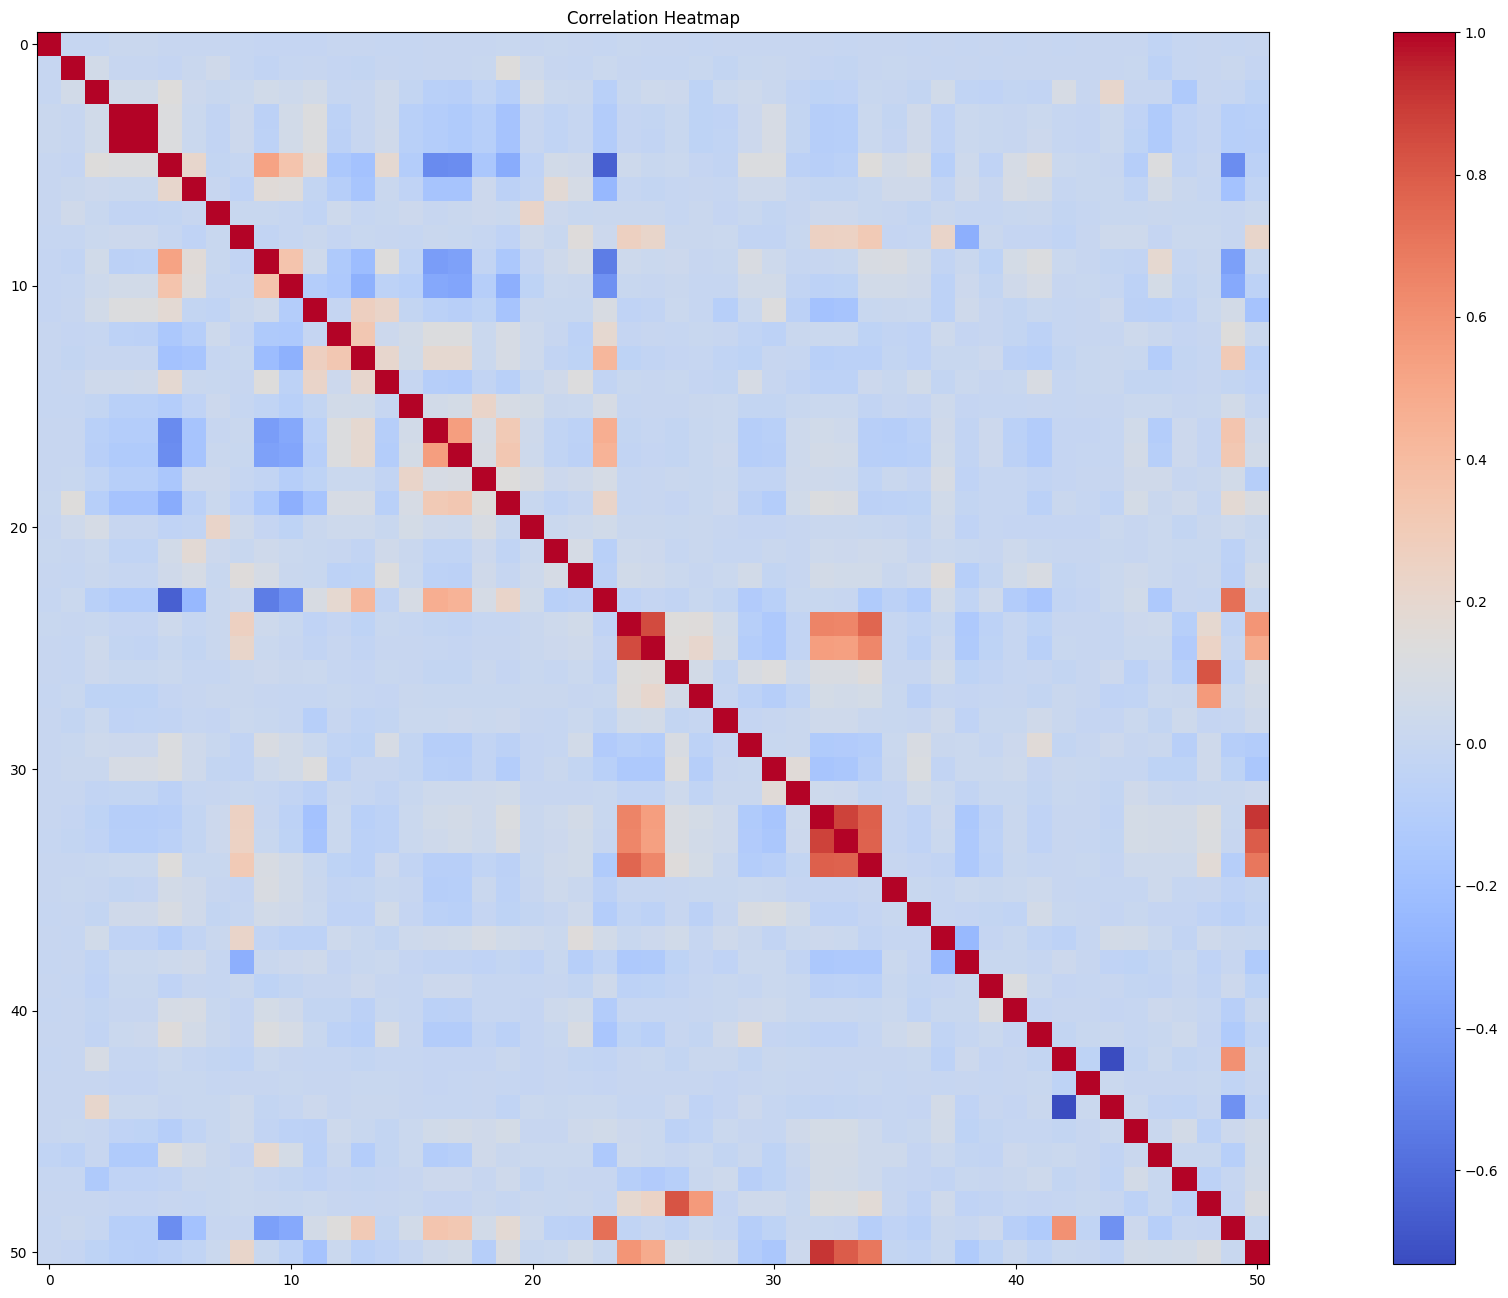

Features most correlated with mortality:
 mortality        1.000000
actp             0.079146
locp             0.074414
larrout          0.074015
age              0.070843
pr1              0.067892
plan_locp        0.064051
obs              0.060599
pr               0.056867
vma              0.055249
plan             0.047867
secu3            0.045993
situ             0.039674
col              0.036251
circ             0.035127
etatp            0.033740
place            0.030189
hour_vma         0.029424
prof             0.024426
trajet           0.019931
catu             0.019814
hour_category    0.019523
adr_encoded      0.013695
atm              0.011842
nbv              0.010282
mois             0.006613
catv             0.006154
secu1            0.004666
surf             0.004266
infra            0.000293
lum              0.000006
jour            -0.000288
minute          -0.000428
motor           -0.006670
manv            -0.006926
secu2           -0.007415
senc            -0.007

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = merged_df_cleaned.corr()

# Plot the heatmap using matplotlib
plt.figure(figsize=(32, 16))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

# Identify features most correlated with 'mortality'
if 'mortality' in correlation_matrix.columns:
    mortality_correlation = correlation_matrix['mortality'].sort_values(ascending=False)
    print("Features most correlated with mortality:\n", mortality_correlation)
else:
    print("'mortality' column not found in the correlation matrix.")


In [ ]:
pip install scikeras


In [ ]:
!pip install tensorflow

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf

from scikeras.wrappers import KerasClassifier

import numpy as np
# Select relevant features
selected_columns = ['age'
,'obs'
,'plan'
,'situ'
,'col',
'circ',
'prof', 'mortality']
data = merged_df_cleaned[selected_columns]

# Example dataset
X = data.drop('mortality', axis=1)  # Features
y = data['mortality']  # Target

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Train a model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters
kmeans.fit(X_train)
print("KMeans Cluster Centers:", kmeans.cluster_centers_)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust activation for regression/classification
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)

log_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

log_grid_search = GridSearchCV(log_pipeline, log_param_grid, cv=cv, scoring='accuracy', verbose=1)
log_grid_search.fit(X_train, y_train)
print("Logistic Regression Best Params:", log_grid_search.best_params_)
print("Logistic Regression CV Accuracy:", log_grid_search.best_score_)

# Decision Tree with Cross-Validation
tree_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:


# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest with Cross-Validation
rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=cv, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)
print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest CV Accuracy:", rf_grid_search.best_score_)

# Logistic Regression with Cross-Validation
log_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])


In [ ]:
tree_param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

tree_grid_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=cv, scoring='accuracy', verbose=1)
tree_grid_search.fit(X_train, y_train)
print("Decision Tree Best Params:", tree_grid_search.best_params_)
print("Decision Tree CV Accuracy:", tree_grid_search.best_score_)

# Linear Regression with Cross-Validation
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
lin_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('regressor', LinearRegression())
])

# Linear Regression doesn't require grid search (no hyperparameters to tune)
lin_scores = cross_val_score(lin_pipeline, X_train, y_train, cv=cv, scoring=scoring_mse)
print("Linear Regression Mean CV MSE:", -np.mean(lin_scores))

# KMeans with Cross-Validation (Cluster Evaluation using silhouette score)
from sklearn.metrics import silhouette_score

def kmeans_cv_score(X, y, cv_splits, n_clusters):
    scores = []
    for train_idx, test_idx in cv_splits.split(X, y):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X[train_idx])
        labels = kmeans.predict(X[test_idx])
        score = silhouette_score(X[test_idx], labels)
        scores.append(score)
    return np.mean(scores)

kmeans_score = kmeans_cv_score(X.values, y.values, cv, n_clusters=3)
print("KMeans Mean Silhouette Score (CV):", kmeans_score)

# Neural Network with Cross-Validation
def create_nn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=create_nn, epochs=10, batch_size=32, verbose=0)
nn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', nn_model)
])

nn_scores = cross_val_score(nn_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print("Neural Network Mean CV Accuracy:", np.mean(nn_scores))

# Evaluate all models on the test set
models = {
    "Random Forest": rf_grid_search.best_estimator_,
    "Logistic Regression": log_grid_search.best_estimator_,
    "Decision Tree": tree_grid_search.best_estimator_
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Test Classification Report:")
    print(classification_report(y_test, y_pred))





In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

# Select relevant features
selected_columns = ['age', 'obs', 'plan', 'situ', 'col', 'circ', 'prof', 'mortality']
data = merged_df_cleaned[selected_columns]

# Features and target
X = data.drop('mortality', axis=1)
y = data['mortality']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# =======================
# Random Forest Tuning
# =======================
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1
)
rf_search.fit(X_train, y_train)

# Best Random Forest
best_rf = rf_search.best_estimator_
print("Best Random Forest Parameters:", rf_search.best_params_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, best_rf.predict(X_test)))
print(classification_report(y_test, best_rf.predict(X_test)))

# =======================
# Logistic Regression Tuning
# =======================
logistic = LogisticRegression(random_state=42)
param_dist_log = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

log_search = RandomizedSearchCV(
    estimator=logistic, param_distributions=param_dist_log, n_iter=5, cv=3, scoring='accuracy', verbose=2, n_jobs=-1
)
log_search.fit(X_train, y_train)

# Best Logistic Regression
best_log = log_search.best_estimator_
print("Best Logistic Regression Parameters:", log_search.best_params_)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, best_log.predict(X_test)))
print(classification_report(y_test, best_log.predict(X_test)))

# =======================
# Neural Network Training
# =======================
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build the neural network
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
nn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the neural network
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Test Accuracy:", nn_accuracy)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ========================
# Model Accuracy Comparison Bar Chart
# ========================
model_names = ['Random Forest', 'Logistic Regression', 'Neural Network']
model_accuracies = [
    accuracy_score(y_test, best_rf.predict(X_test)),
    accuracy_score(y_test, best_log.predict(X_test)),
    nn_accuracy
]

plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.show()

# ========================
# Confusion Matrices
# ========================
models = {
    'Random Forest': best_rf.predict(X_test),
    'Logistic Regression': best_log.predict(X_test),
    'Neural Network': (nn_model.predict(X_test) > 0.5).astype(int)
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# ========================
# ROC Curves
# ========================
plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    if model_name == 'Neural Network':
        prob = nn_model.predict(X_test).ravel()  # Use probabilities for NN
    else:
        prob = best_rf.predict_proba(X_test)[:, 1] if model_name == 'Random Forest' else best_log.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# ========================
# Loss Curve for Neural Network (Optional)
# ========================
history = nn_model.history.history
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# =======================
# Decision Tree Tuning
# =======================
dt = DecisionTreeClassifier(random_state=42)
param_dist_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_search = RandomizedSearchCV(
    estimator=dt, param_distributions=param_dist_dt, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1
)
dt_search.fit(X_train, y_train)

# Best Decision Tree
best_dt = dt_search.best_estimator_
print("Best Decision Tree Parameters:", dt_search.best_params_)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, best_dt.predict(X_test)))
print(classification_report(y_test, best_dt.predict(X_test)))

# =======================
# Add Decision Tree to Visualizations
# =======================
# Model Names and Accuracies
model_names = ['Random Forest', 'Logistic Regression', 'Neural Network', 'Decision Tree']
model_accuracies = [
    accuracy_score(y_test, best_rf.predict(X_test)),
    accuracy_score(y_test, best_log.predict(X_test)),
    nn_accuracy,
    accuracy_score(y_test, best_dt.predict(X_test))
]

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.show()

# Confusion Matrices
models = {
    'Random Forest': best_rf.predict(X_test),
    'Logistic Regression': best_log.predict(X_test),
    'Neural Network': (nn_model.predict(X_test) > 0.5).astype(int),
    'Decision Tree': best_dt.predict(X_test)
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))

for model_name, predictions in models.items():
    if model_name == 'Neural Network':
        prob = nn_model.predict(X_test).ravel()  # Use probabilities for NN
    elif model_name == 'Random Forest':
        prob = best_rf.predict_proba(X_test)[:, 1]
    elif model_name == 'Logistic Regression':
        prob = best_log.predict_proba(X_test)[:, 1]
    else:  # Decision Tree
        prob = best_dt.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
